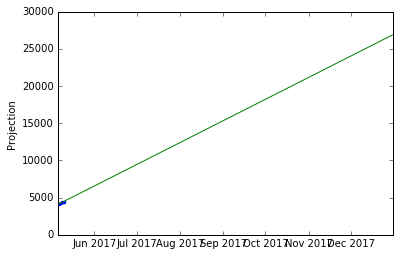

As of 2017-05-11: 
2017-05-16 5045.40000002
2017-06-06 7048.80000009
2017-06-27 9052.20000015
2017-07-18 11055.6000002


In [3]:
import math
from datetime import datetime, date

import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import numpy as np


def print_dest(pol, dest):
    root = int(math.ceil(max(np.roots(pol - dest))))
    print(mdates.num2date(root).date(), pol(root))


def main():
    progress_journal = [
        ['2017/5/6', 4075],
        ['2017/5/7', 4199],
        ['2017/5/8', 4294],
        ['2017/5/9', 4383],
        ['2017/5/10', 4460],
    ]

    dates = [datetime.strptime(row[0], '%Y/%m/%d') for row in progress_journal]
    x = mdates.date2num(dates)
    y = [row[1] for row in progress_journal]

    fn = np.poly1d(np.polyfit(x, y, 1))
    
    plt.plot(mdates.num2date(x), y, '.')
    end_date = date(2017, 12, 31)
    x2 = np.linspace(x.min(), mdates.date2num(end_date), 100)

    l1, = plt.plot(mdates.num2date(x2), fn(x2), label='Now')
    plt.ylabel('Projection')
    plt.show()

    print("Final goal: 11021")
    print("As of " + str(datetime.now().date()) + ": ")
    print_dest(fn, 5000)
    print_dest(fn, 7000)
    print_dest(fn, 9000)
    print_dest(fn, 11021)
    

# As of 2017-05-10: 
# 2017-05-16 5045.40000002
# 2017-06-06 7048.80000009
# 2017-06-27 9052.20000015
# 2017-07-18 11055.6000002

if __name__ == "__main__":
    main()